In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

np.random.seed(123)

## Simulación del rendimiento de un portafolio con Moviemiento browniano

In [2]:
def get_data(stocks, start_date, end_date):
    prices = yf.download(stocks, start_date, end_date, progress = False)["Close"]
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    cov_returns = returns.cov()
    return mean_returns, cov_returns, prices

In [3]:
def simular_precios(mean_returns, cov_returns, prices, num_dias, stocks, weights):

    N = 10000
    portfolio_return = np.dot(weights, mean_returns)

    portfolio_simulated_returns = np.zeros((num_dias, N)) # filas x columnas
    mean_returns = np.full(shape = (num_dias, len(stocks)), fill_value=portfolio_return)

    for m in range(N):
        L = np.linalg.cholesky(cov_returns)
        Z = np.random.normal(size=(num_dias, len(stocks))) # Matriz de n_dias (filas) y n_stocks (columnas)
        daily_returns = mean_returns.T + np.dot(L, Z.T)
        portfolio_simulated_returns [:, m] = np.cumprod(np.dot(weights, daily_returns) + 1)
    
    return portfolio_simulated_returns

In [4]:
stocks = ['AAPL','MSFT','TSLA']
weights = np.random.dirichlet(np.ones(len(stocks)))
start_date = '2020-01-01'
end_date = '2025-01-12'
num_dias = 14
N = 10

In [5]:
mean_returns, cov_returns, prices = get_data(stocks, start_date, end_date)
portafolios_simulados = simular_precios(mean_returns, cov_returns, prices, num_dias, stocks, weights)

YF.download() has changed argument auto_adjust default to True


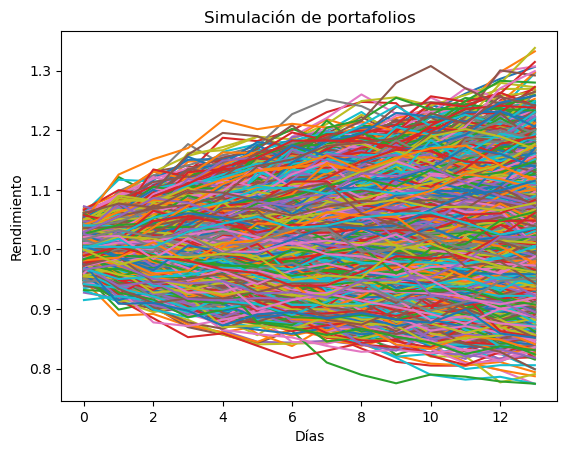

In [6]:
plt.plot(portafolios_simulados)
plt.ylabel('Rendimiento')
plt.xlabel('Días')
plt.title('Simulación de portafolios')
plt.show()

In [7]:
portafolios_simulados[13]

array([0.9181232 , 1.08937393, 1.00893365, ..., 0.96096128, 0.96175765,
       1.0361118 ])

In [8]:
np.percentile(portafolios_simulados[13], 5) - 1

-0.1022835570095203